**Description**

Kmeans est une technique de Machine Learning qui est utilisée pour le regroupement des données (clustering) en groupes (clusters).

*Modèle:*

Le modèle de Kmeans est l'ensemble des centres des clusters.

*Hyperparamètre:*

Kmeans a un hyperparamètre appelé K qui représente le nombre de clusters.

*Apprentissage:*

L'algorithme d'apprentissage de Kmeans est non supervisé : il apprend avec des données non étiquetées. Cet algorithme essaie de trouver les centres des clusters optimales. 

*Prédiction:*

Une fois l'apprentissage est fini, Kmeans permet de prédire pour un point donné à quel groupe il appartient.

**Données d'apprentissage**

Soit une population ds employés qu'on veut regrouper en clusters.

Créer une matrice des données d'employés X (comme étant des points de même dimension).

              X=[1100.67 31
                 3500.98 58
                 1300.58 35
                 3100.98 55
                 1200.77 32]


In [2]:
# cree une matrice de donnée d'employés X avec 3 clusters
import numpy as np
X=np.array([[1100.67, 31],
            [1300.58, 35],
            [3500.98, 58],
            [3100.98, 55],
            [1200.77, 32]])

**Hyperparamètre**

Choisir le nombre des clusters K

In [3]:
K=2

**Modèle**

Initialiser les centres des clusters

Choisir d'une façon aléatoire K points des données comme centres des clusters.

Notes:
- Mettre les centres intiales dans une matrice M
- Utiliser la fonction random.choice()

In [6]:
# 1. Initialisation des centres using random selection of K points from X 
M=X[np.random.choice(X.shape[0], K, replace=False),:] # M est la matrice des centres de clusters 
print(M)

[[1300.58   35.  ]
 [3100.98   55.  ]]


**Apprentissage**

L'algorithme est comme suit :

          Pour chaque t de 0 jusqu'à T-1 faire
            Pour chaque point p des données faire
              Pour chaque centre m_i des clusters M faire
                d=distance euclidienne(p,m_i)
                Ajouter d dans distances
              label de p = argmin(distances) 
              Ajouter label à labels
            Pour chaque centre m_i des clusters faire
              c=moyenne arithmétique des points ayant label egale à i

Etape 1: Implémenter la fonction predire_label() qui prend un point p et qui retourne le label de cluster auquel p appartient.

        Pour chaque centre m_i des clusters M faire
            d=distance euclidienne(p,m_i)
            Ajouter d dans distances
        label de p = argmin(distances)

Notes:
- Utiliser M comme variable globale.
- Utiliser la fonction np.argmin()

In [7]:
def predict_label(p):
    distance=np.empty(K) # distance est un vecteur de taille K
    for m in M: # pour chaque centre de cluster
        d=np.linalg.norm(p-m) # calculer la distance euclidienne entre p et m
        distance= np.append(distance,d) # ajouter la distance au vecteur distance
    return np.argmin(distance) # retourner l'indice du minimum de distance


Etape 2: Définir la fonction determiner_labels() qui prend un ensemble des points X et qui retourne les labels de tous les points.

Cette fonction impélmente la partie de l'algorithme d'apprentissage suivante:

          Pour chaque point p des données faire
              Pour chaque centre m_i des clusters M faire
                d=distance euclidienne(p,m_i)
                Ajouter d dans distances
              label de p = argmin(distances) 
              Ajouter label à labels
Note:
- Un label designe l'indice de groupe auquel apparetient un point.
- Utiliser la fonction predire_label()
- Utiliser M comme variable globale.

In [9]:
def determine_label(X):
    labels=np.empty(X.shape[0]) # labels est un vecteur de taille X.shape[0]
    for x in X: 
        labed=predict_label(x) # pour chaque point x, prédire son label
        labels=np.append(labels,labed) # ajouter le label au vecteur labels
    return labels

Etape 3: Définir une fonction mettre_a_jour_centres() qui prend les points et leurs labels d'appartenance aux clusters.

          Pour chaque centre m_i des clusters faire
              m_i=moyenne arithmétique des points ayant label egale à i

Note:
- Utiliser np.mean()

In [12]:
def maj_centres(X,labels):
    for m in M:
        m=np.mean(X[labels==m],axis=0) # pour chaque centre de cluster, calculer la moyenne des points qui lui sont associés
    return M

Etape 4:

Définir la fonction fit() qui implémente tout l'algorithme d'apprentissage. Elle prend l'ensemble des points X et elle met à jour M (les centres des clusters).

Notes:
- Utiliser M comme une variable globale.
- Utiliser les fonctions determiner_labels() et les fonctions mettre_a_jour()

In [26]:
def fit(X):
    for i in range(10):
        labels=determine_label(X) # prédire les labels de chaque point
        M=maj_centres(X,labels) # mettre à jour les centres de clusters
    return M,labels

**Prédiction**

Définir une fonction predict() qui prend une matrice des points d'employés X. Elle retourne les labels de ces points.

Note:
- Utiliser la fonction predire_label
- Utiliser M comme variable globale.

In [15]:
def predict(X):
    result = np.empty(X.shape[0])
    for x in X:
        result=np.append(result,predict_label(x))
    return result

**Recap**

Nous allons définir Kmeans sous la forme d'une classe que vous appelez Kmeans.

Elle contient les fonctions suivantes:
- un constructeur dans lequel:
  - L'hyperparamètre K est considéré comme attribut d'objet. Il permet de l'initialiser.
  - Le modèle M (les centres de clusters) est initialisé aléatoirement
- la fonction fit() définie ci-dessus
- la fonction predict() définie ci-dessus

In [34]:
class Kmeans:
    def __init__(self, K=2, max_iter=10):
        self.K = K
        self.max_iter = max_iter

    def fit(self, X):
        self.M=X[np.random.choice(X.shape[0], self.K, replace=False),:]
        for i in range(self.max_iter):
            self.labels=self.determine_label(X)
            self.M=self.maj_centres(X,self.labels)
        
    def predict(self, X):
        result =[]
        for x in X:
            result=np.append(result,predict_label(x))
        return result

In [17]:
import numpy as np
X=np.array([[1100.67, 31],[1300.58, 35],[3500.98, 58],[3100.98, 55],[1200.77, 32]])

In [18]:
km=Kmeans(K=2) # instancier un objet de la classe Kmeans

In [35]:
km.fit(X) # appeler la méthode fit de l'objet km

C:\Users\msi\AppData\Local\Temp\ipykernel_3492\3714762891.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  m=np.mean(X[labels==m],axis=0) # pour chaque centre de cluster, calculer la moyenne des points qui lui sont associés
C:\Users\msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(array([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 3., 0.]))

In [38]:
km.predict(X)  # appeler la méthode predict de l'objet km

array([0., 0., 0., 0., 0., 0., 0., 0., 3., 0.])

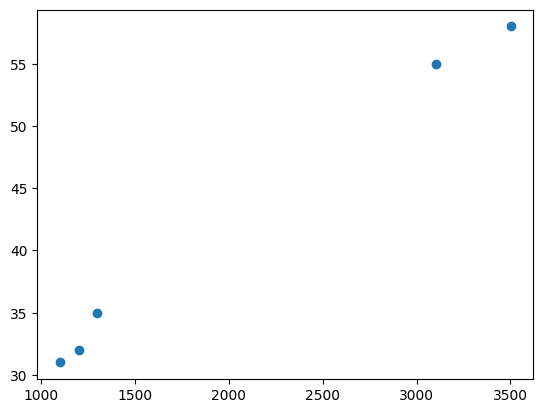

In [66]:
#example of kmeans clustering
#test data consists of 2 clusters of seniors and juniors with 2 features each (salary and age)
#we want to predict the cluster of a new employee 
test_data = np.array([[1100.67, 31],[1300.58, 35],[3500.98, 58],[3100.98, 55],[1200.77, 32]])
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(test_data[:,0], test_data[:,1])
plt.show()

In [67]:
#instanciate a Kmeans object with 2 clusters
K=2
clusters=km.predict(test_data)
#show first cluster in red and second in blue
plt.scatter(test_data[clusters==0,0], test_data[clusters==0,1], c='r') 
plt.scatter(test_data[clusters==1,0], test_data[clusters==1,1], c='b') 
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 10